## Plotting the longer trajectories


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

um_per_pixel = 0.117

In [22]:
df_combined = pd.read_csv(r'Z:\Bisal_Halder_turbo\PROCESSED_DATA\Trial_analysis\Noco\2x_alpha and D\20240116_UGD-2x-2s-replicate1-FOV_alpha_and_D_w10.csv')
df_combined[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'alpha' ]]


,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T,alpha
0,0.0,97.226506,610.417908,0.0,NaN
1,0.0,97.340578,610.447290,2.0,NaN
2,0.0,97.266381,610.335617,4.0,NaN
3,0.0,97.068100,610.387569,6.0,NaN
4,0.0,97.422783,610.525021,8.0,NaN
...,...,...,...,...,...
257183,999.0,220.254053,489.098861,396.0,NaN
257184,999.0,219.726405,489.240118,398.0,NaN
257185,NaN,NaN,NaN,NaN,NaN
257186,NaN,NaN,NaN,NaN,NaN


In [23]:
df_combined['POSITION_X'] = df_combined['POSITION_X'] * um_per_pixel
df_combined['POSITION_Y'] = df_combined['POSITION_Y'] * um_per_pixel
df_combined[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'alpha' ]]



,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T,alpha
0,0.0,11.375501,71.418895,0.0,NaN
1,0.0,11.388848,71.422333,2.0,NaN
2,0.0,11.380167,71.409267,4.0,NaN
3,0.0,11.356968,71.415346,6.0,NaN
4,0.0,11.398466,71.431427,8.0,NaN
...,...,...,...,...,...
257183,999.0,25.769724,57.224567,396.0,NaN
257184,999.0,25.707989,57.241094,398.0,NaN
257185,NaN,NaN,NaN,NaN,NaN
257186,NaN,NaN,NaN,NaN,NaN


Track ID 501.0 data:
        TRACK_ID  POSITION_X  POSITION_Y  POSITION_T  alpha
169971     501.0   23.261321   26.238825         0.0    NaN
169972     501.0   23.260125   26.229665         2.0    NaN
169973     501.0   23.262419   26.259116         4.0    NaN
169974     501.0   23.287498   26.264554         6.0    NaN
169975     501.0   23.275547   26.282506         8.0    NaN
...          ...         ...         ...         ...    ...
170166     501.0   23.811394   26.855155       390.0    NaN
170167     501.0   23.843417   26.860374       392.0    NaN
170168     501.0   23.820615   26.852541       394.0    NaN
170169     501.0   23.851262   26.868147       396.0    NaN
170170     501.0   23.859014   26.878382       398.0    NaN

[200 rows x 5 columns]



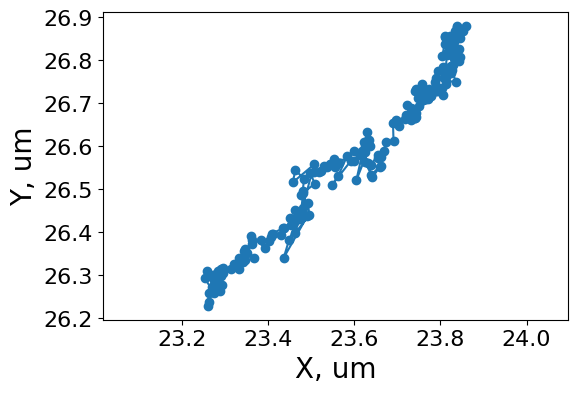

In [29]:
alpha_threshold = 1
min_windows = 5

trajectory_counts = df_combined [df_combined['alpha'] > alpha_threshold].groupby('TRACK_ID')['alpha'].count()
valid_trajectories = trajectory_counts [trajectory_counts > min_windows].index
num_trajectories_to_select = 1
selected_trajectories = np.random.choice (valid_trajectories, size = num_trajectories_to_select)
plt.figure (figsize = (6, 4))
for track_id in selected_trajectories:
    track_data = df_combined [df_combined ['TRACK_ID'] == track_id]

    print (f'Track ID {track_id} data:')
    print (track_data [['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'alpha']])
    print ()

    plt.plot (track_data ['POSITION_X'], track_data ['POSITION_Y'], marker = 'o')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axis('equal')
plt.xlabel('X, um', fontsize=20)
plt.ylabel('Y, um', fontsize = 20)
plt.show()

    